1. Preparación de datos: División train/test

In [418]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [419]:
#Separamos los datos en train (80%)y test (20%) para luego explorarlos

from sklearn.model_selection import train_test_split

df_airbnb_full = pd.read_csv("airbnb-listings-extract.csv", sep=';')
train, test = train_test_split(df_airbnb_full, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [420]:
#Guardo el test para evaluar el modelo luego

train.to_csv('airbnb-listings-extract_train.csv', sep=';', decimal='.', index=False)
test.to_csv('airbnb-listings-extract_test.csv', sep=';', decimal='.', index=False)

#A partir de acá trabajo sólo con el dataset de train

df_airbnb = pd.read_csv('airbnb-listings-extract_train.csv', sep=";", decimal='.')


2. Análisis exploratorio

In [421]:
df_airbnb.head(2)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."


In [422]:
print(df_airbnb.shape)         # corroboro que sea el dataset de train : (11824 rows and 89 columns)

df_airbnb.describe().T

(11824, 89)


,count,mean,std,min,25%,50%,75%,max
ID,11824.0,1.025308e+07,5.566485e+06,1.986400e+04,5.510692e+06,1.125754e+07,1.531982e+07,1.858361e+07
Scrape ID,11824.0,2.017038e+13,5.505346e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11824.0,3.588310e+07,3.411993e+07,1.745300e+04,6.855490e+06,2.454770e+07,5.431096e+07,1.247534e+08
Host Response Rate,10317.0,9.480372e+01,1.524708e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11821.0,1.275442e+01,3.457890e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,11821.0,1.275442e+01,3.457890e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,11824.0,4.049163e+01,4.701030e+00,-3.785118e+01,4.040976e+01,4.041933e+01,4.043078e+01,5.596691e+01
Longitude,11824.0,-3.776863e+00,1.401469e+01,-1.231244e+02,-3.707538e+00,-3.700763e+00,-3.683917e+00,1.533714e+02
Accommodates,11824.0,3.277486e+00,2.093973e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,11780.0,1.285229e+00,6.646911e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [423]:
print(df_airbnb.columns)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Columnas que no tendré en cuenta por ser url o strings , ya que no aportan nada para el modelo de ML con el objetivo de predecir un precio:
Listing Url --> url (de cada hospedaje)
Scraped ID ---> ver cuantos valores únicos hay
Last Scraped ---> fechas
Summary ---> strings/no aporta a un modelo
Space ---> string/ descripcion del piso/opiniones
Descripcion ---> string/idem anterior.
Experiences Offered ---> Nones.. ver valores unicos
Neighborhoos Overview ---> string/vistas
Notes ---> string / anotaciones propietario
Transit ---> string/ como llegar al piso
Access ---> string/ 
Interaction ---> string/mensajes del host al guest
House Rules ---> string/rules
Thumbnail Url ---> links de vistas previas imagenes 
Medium Url --->url/string
Picture Url ---> url
XL Picture Url ---> url
Host URL ---> url
Host Name ---> string que no me importa para el modelo
Host Since, 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
Host About ---> string 
Host Acceptance Rate ---> 
Host Picture Url --->url
Host Listings Count ---> es igual a Host total Listings Count?
Has Availability, License, Jurisdiction Names ---> columnas casi vacias(>95% de valores nulos)
Geolocation ---> ya esta separado en Latitude y Longitude
'Host Since', 'Host Location'---> fechas
Features--> string/descriptions

Luego filtraré por 'City' para quedarme con los datos sólo de Madrid, con lo cual desecho las columnas 'State','Market','Smart Location','Country Code','Country'

In [424]:
columns_no_imp = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Verifications', 'Street','Neighbourhood', 'Neighbourhood Cleansed',
       'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'First Review', 'Last Review',
       'Review Scores Value', 'Calculated host listings count',
       'Geolocation', 'Features','Amenities','State','Market','Smart Location',
       'Country Code','Country' ]

df_airbnb_cleaned = df_airbnb.copy()


df_airbnb_cleaned.drop(columns=[col for col in columns_no_imp if col in df_airbnb_cleaned.columns], inplace=True)



In [425]:
#Veo los valores nulos en las variables
df_airbnb_cleaned.isnull().sum()

ID                                  0
Host ID                             0
Host Response Time               1507
Host Response Rate               1507
Host Listings Count                 3
Host Total Listings Count           3
Neighbourhood Group Cleansed      818
City                                4
Zipcode                           398
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          44
Bedrooms                           20
Beds                               37
Bed Type                            0
Square Feet                     11350
Price                              15
Weekly Price                     8943
Monthly Price                    8955
Security Deposit                 6772
Cleaning Fee                     4850
Guests Included                     0
Extra People                        0
Minimum Nigh

In [ ]:
#Imputaciones de valores nulos en variables que me interesan y tienen menos de 50 nulos
# Para el caso de la variable 'Price' , elimino los valores nulos ya que son pocos (15 en total), y no se pueden usar para entrenar el modelo.
df_airbnb_cleaned = df_airbnb_cleaned.dropna(subset=['Price'])
#Para las variables de Bathroom, Bedrooms y Beds, completo los null (son relativamente podcos valores) con la moda, son variable sque pueden ser útiles

columns_to_impute = ['Bathrooms', 'Bedrooms', 'Beds']

# Imputar valores nulos con la moda de cada columna
for col in columns_to_impute:
    df_airbnb_cleaned[col] = df_airbnb_cleaned[col].fillna(df_airbnb_cleaned[col].mode()[0])


In [427]:
pd.set_option('display.max_rows', None)
df_airbnb_cleaned.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Host ID,31124866,85301317,84213235,15258781,1706029
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Listings Count,2.0,1.0,16.0,114.0,2.0
Host Total Listings Count,2.0,1.0,16.0,114.0,2.0
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,28014,28012,28025,28012,28015
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631


In [428]:
# La idea es predecir el precio de los airbnb en la ciudad de Madrid
# Filtro todas las filas donde 'City' contenga la palabra "Madrid" (ignorando mayúsculas/minúsculas y na)
df_madrid_cleaned = df_airbnb_cleaned[df_airbnb_cleaned['City'].str.contains('madrid', case=False, na=False)]
#Confirmo:
print(df_madrid_cleaned['City'].value_counts())

City
Madrid                                 10559
Madrid, Comunidad de Madrid, ES           14
madrid                                     6
MADRID                                     2
las matas  madrid                          1
Delicias-Madrid                            1
Madrid, Comunidad de Madrid, ESPANA        1
Chueca, Madrid                             1
Aravaca (Madrid)                           1
Name: count, dtype: int64


In [429]:
#Elimino la variable 'City':
df_madrid_cleaned = df_madrid_cleaned.drop(['City'], axis=1)

In [430]:
# Creo que el barrio donde esté el airbnb puede influir en el precio:
df_madrid_cleaned['Neighbourhood Group Cleansed'].value_counts()


Neighbourhood Group Cleansed
Centro                   5423
Chamberí                  763
Salamanca                 717
Arganzuela                638
Tetuán                    364
Retiro                    355
Moncloa - Aravaca         335
Latina                    295
Carabanchel               289
Chamartín                 279
Ciudad Lineal             247
Puente de Vallecas        170
Hortaleza                 138
Fuencarral - El Pardo     116
Usera                     115
San Blas - Canillejas      90
Barajas                    66
Moratalaz                  61
Villaverde                 60
Villa de Vallecas          38
Vicálvaro                  27
Name: count, dtype: int64

In [433]:
# Como me interesa los barrios: aplico un Target encoder a la variable 'Neighbourhood Group Cleansed' 
# Calculo la media del precio 
target_mean = df_madrid_cleaned.groupby('Neighbourhood Group Cleansed')['Price'].mean()

# Mapeo las medias a
df_madrid_cleaned['Neighbourhood Group Cleansed Encoded'] = df_madrid_cleaned['Neighbourhood Group Cleansed'].map(target_mean)

# Mapeo las medias al conjunto de prueba y cambio los nulls por la media 
global_mean =df_madrid_cleaned ['Price'].mean()
df_madrid_cleaned['Neighbourhood Group Cleansed Encoded'] = df_madrid_cleaned['Neighbourhood Group Cleansed'].map(target_mean).fillna(global_mean)

In [ ]:
# Veo que las varibles 'License' y 'Jurisdiction Name' tiene muchos na, las quito:
# Eliminar columnas del DataFrame original
df_madrid_cleaned.drop(['License', 'Jurisdiction Names'], axis=1, inplace=True)

# Nota: Square Feet sería una variable de interés, pero tiene un 96% de valores nulos, sin embargo no la descarto
#y decido pasar a Square Meters
df_madrid_cleaned['Square Meters'] = df_madrid_cleaned['Square Feet'] * 0.092903


11809
<bound method Series.unique of Accommodates
2     4227
4     2610
1     1634
3     1140
6      940
5      551
8      267
7      174
10      97
9       59
12      42
16      30
11      19
14      12
15       4
13       3
Name: count, dtype: int64>


Text(0.5, 0, 'Accommodates')

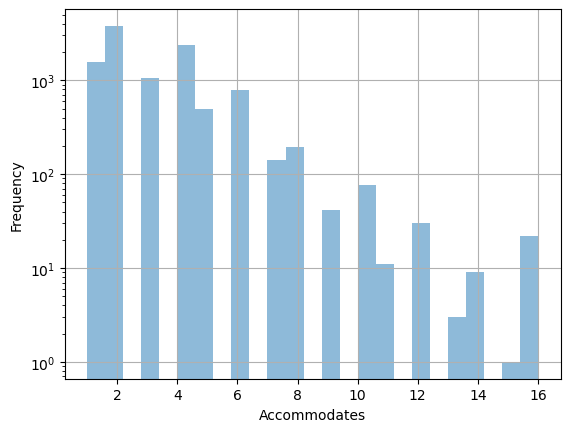

In [434]:
#Veo si esta variable puede resultar interesante
print(df_airbnb_cleaned['Accommodates'].value_counts().sum())
print(df_airbnb_cleaned['Accommodates'].value_counts().unique)

df_madrid_cleaned['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Accommodates')

In [435]:
df_madrid_cleaned.dtypes

ID                                        int64
Host ID                                   int64
Host Response Time                       object
Host Response Rate                      float64
Host Listings Count                     float64
Host Total Listings Count               float64
Neighbourhood Group Cleansed             object
Zipcode                                  object
Latitude                                float64
Longitude                               float64
Property Type                            object
Room Type                                object
Accommodates                              int64
Bathrooms                               float64
Bedrooms                                float64
Beds                                    float64
Bed Type                                 object
Square Feet                             float64
Price                                   float64
Weekly Price                            float64
Monthly Price                           

In [436]:
#Variables categóricas e imputaciones
#Zipcode:lo convierto en int
from sklearn.calibration import LabelEncoder

df_madrid_cleaned['Zipcode'] = pd.to_numeric(df_madrid_cleaned['Zipcode'], errors='coerce')  # Convierte y pone NaN en caso de error
df_madrid_cleaned['Zipcode'].fillna(0, inplace=True)

#Host Response Time 
le = LabelEncoder()
df_madrid_cleaned['Host Response Time'] = le.fit_transform(df_madrid_cleaned['Host Response Time'])

#Bed Type
df_madrid_cleaned['Bed Type'] = le.fit_transform(df_madrid_cleaned['Bed Type'])

#Cancellation Policy
df_madrid_cleaned['Cancellation Policy'] = le.fit_transform(df_madrid_cleaned['Cancellation Policy'])

#Property Type                            
df_madrid_cleaned['Property Type'] = le.fit_transform(df_madrid_cleaned['Property Type'])

#Room Type 
df_madrid_cleaned['Room Type'] = le.fit_transform(df_madrid_cleaned['Room Type'])

#Host Total Listings Count
df_madrid_cleaned['Host Total Listings Count'].fillna(0, inplace=True)

#Security Deposit 
df_madrid_cleaned['Security Deposit'].fillna(df_madrid_cleaned['Security Deposit'].mode()[0], inplace=True)

#Cleaning Fee
df_madrid_cleaned['Cleaning Fee'].fillna(df_madrid_cleaned['Cleaning Fee'].mode()[0], inplace=True)

#Review Scores Rating
df_madrid_cleaned['Review Scores Rating'].fillna(df_madrid_cleaned['Review Scores Rating'].mode()[0], inplace=True)

#Reviews per Month 
df_madrid_cleaned['Reviews per Month'].fillna(0, inplace=True)

columns_to_enc =['Neighbourhood Group Cleansed']

df_madrid_cleaned.drop(columns=[col for col in columns_to_enc if col in df_madrid_cleaned.columns], inplace=True)

In [437]:
# matriz de correlación para chequear correlaciones entre variables
#import seaborn as sns

df_madrid_cleaned.corr(numeric_only=True)


,ID,Host ID,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Zipcode,Latitude,Longitude,Property Type,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Cancellation Policy,Reviews per Month,Square Meters,Neighbourhood Group Cleansed Encoded
ID,1.000000,0.615862,0.071872,0.014286,-0.021850,-0.021803,-0.074490,-0.000832,0.022646,0.058432,...,0.179042,0.103023,0.066026,0.088217,0.085206,0.029223,-0.135221,0.049275,-0.036903,-0.064031
Host ID,0.615862,1.000000,0.061741,-0.026673,-0.087667,-0.087677,-0.053775,-0.019395,0.034417,0.073269,...,0.106488,0.048700,0.031409,0.056667,0.044697,-0.021523,-0.153846,0.036799,-0.029205,-0.113233
Host Response Time,0.071872,0.061741,1.000000,0.605729,-0.034183,-0.034323,0.009691,-0.041939,-0.024936,0.011949,...,0.074457,0.051345,0.061106,0.057148,0.060694,0.032954,-0.012093,0.111896,0.038669,0.019807
Host Response Rate,0.014286,-0.026673,0.605729,1.000000,-0.046791,-0.046791,0.014712,-0.038176,-0.032173,-0.015442,...,0.022237,0.094715,0.117814,0.121711,0.108941,0.062399,0.075432,0.195395,0.071025,0.041415
Host Listings Count,-0.021850,-0.087667,-0.034183,-0.046791,1.000000,1.000000,0.029019,0.008560,-0.042402,-0.086057,...,-0.081704,-0.122229,-0.057639,-0.252023,-0.225271,-0.010548,0.252302,-0.135629,-0.072002,0.135922
Host Total Listings Count,-0.021803,-0.087677,-0.034323,-0.046791,1.000000,1.000000,0.028999,0.008498,-0.042433,-0.086088,...,-0.081772,-0.122229,-0.057639,-0.252023,-0.225271,-0.010548,0.252368,-0.135530,-0.072002,0.135969
Zipcode,-0.074490,-0.053775,0.009691,0.014712,0.029019,0.028999,1.000000,-0.017329,-0.020503,-0.031493,...,-0.037551,-0.015512,-0.007333,0.001867,-0.014030,-0.018501,0.052086,0.031570,0.046543,-0.004261
Latitude,-0.000832,-0.019395,-0.041939,-0.038176,0.008560,0.008498,-0.017329,1.000000,0.250772,0.041539,...,0.012769,-0.000341,-0.010942,0.007525,0.002345,0.052548,-0.036079,-0.067911,0.115998,0.228151
Longitude,0.022646,0.034417,-0.024936,-0.032173,-0.042402,-0.042433,-0.020503,0.250772,1.000000,0.057064,...,0.019009,0.031593,0.029891,0.021014,0.020208,-0.095730,-0.062555,-0.004426,0.028942,-0.069501
Property Type,0.058432,0.073269,0.011949,-0.015442,-0.086057,-0.086088,-0.031493,0.041539,0.057064,1.000000,...,0.020117,-0.000737,0.002621,0.008907,-0.005230,-0.044010,-0.084919,-0.033518,0.030275,-0.102938


In [438]:
# Chequeo correlaciones de la variable Price con el resto
# Calcular la matriz de correlaciones
correlation_matrix = df_airbnb_cleaned.corr(numeric_only=True)

# Extraer correlaciones con 'Price'
price_correlations = correlation_matrix['Price']

# Ordenar correlaciones de mayor a menor (opcional)
price_correlations = price_correlations.sort_values(ascending=False)

# Mostrar el resultado
print(price_correlations)

Price                          1.000000
Weekly Price                   0.880469
Monthly Price                  0.827679
Cleaning Fee                   0.674445
Accommodates                   0.528380
Bedrooms                       0.492313
Square Feet                    0.450778
Beds                           0.437660
Security Deposit               0.403080
Bathrooms                      0.378409
Guests Included                0.296850
Host Listings Count            0.229585
Host Total Listings Count      0.229585
Extra People                   0.104672
Review Scores Location         0.102186
Review Scores Cleanliness      0.078627
Review Scores Rating           0.061904
Review Scores Accuracy         0.059643
Minimum Nights                 0.029632
Host Response Rate             0.005843
Review Scores Communication    0.005208
Longitude                      0.004976
Maximum Nights                 0.000851
Review Scores Checkin         -0.011208
Latitude                      -0.013221


In [439]:
#Luego de un nuevo análisis, decido sacar también las columnas con muy alta correlación o muy baja: 
columns_to_drop_corr =['Weekly Price', 'Monthly Price', 'Review Scores Location','Review Scores Cleanliness',
                       'Review Scores Accuracy','Minimum Nights','Host Response Rate',
                       'Review Scores Communication', 'Review Scores Checkin',
                       'Latitude', 'ID', 'Host ID','Maximum Nights'
                       'Number of Reviews', 'Square Feet','Host Listings Count'] 


df_madrid_cleaned.drop(columns=[col for col in columns_to_drop_corr if col in df_madrid_cleaned.columns], inplace=True)



In [440]:
df_madrid_cleaned.head().T

,0,1,2,3,4
Host Response Time,2.000000,3.000000,3.000000,2.000000,3.000000
Host Total Listings Count,2.000000,1.000000,16.000000,114.000000,2.000000
Zipcode,28014.000000,28012.000000,28025.000000,28012.000000,28015.000000
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716
Property Type,0.000000,0.000000,0.000000,0.000000,0.000000
Room Type,0.000000,0.000000,2.000000,1.000000,1.000000
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000
Beds,2.000000,2.000000,8.000000,1.000000,1.000000


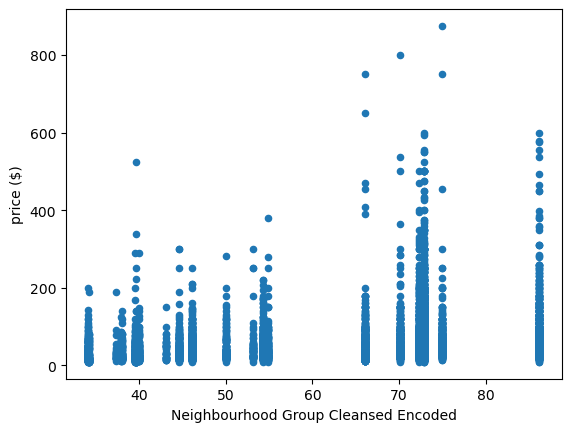

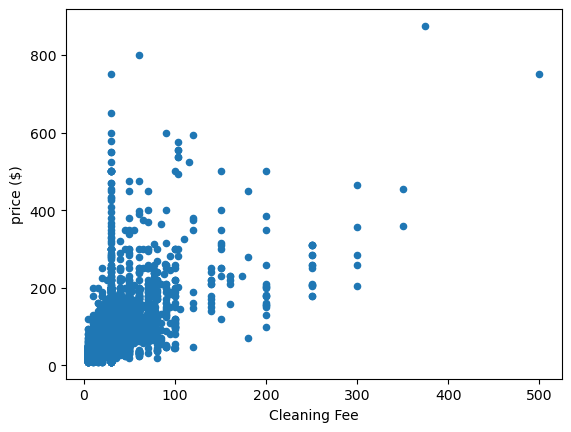

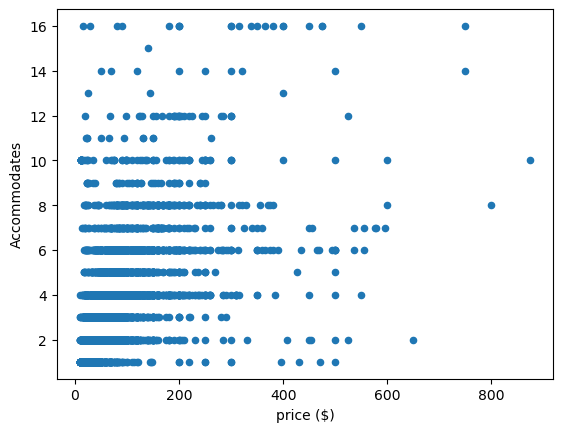

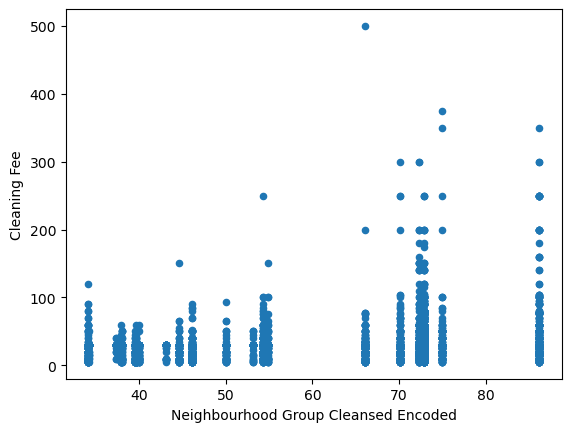

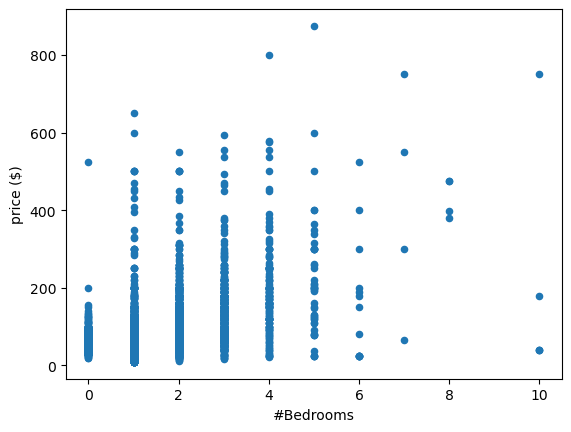

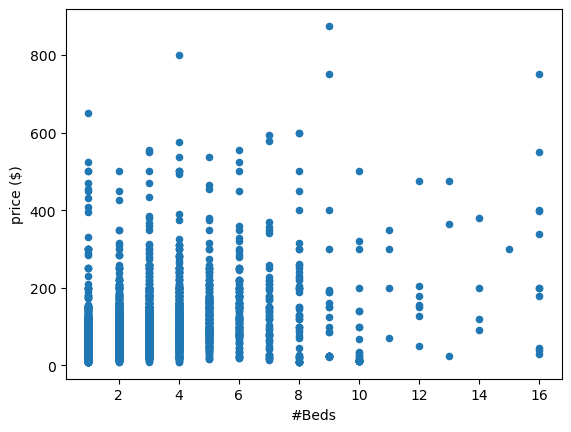

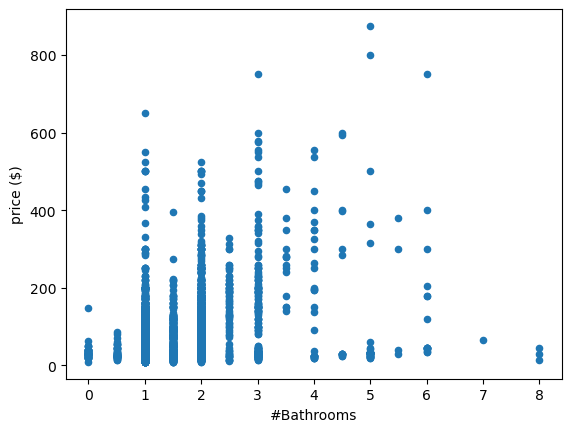

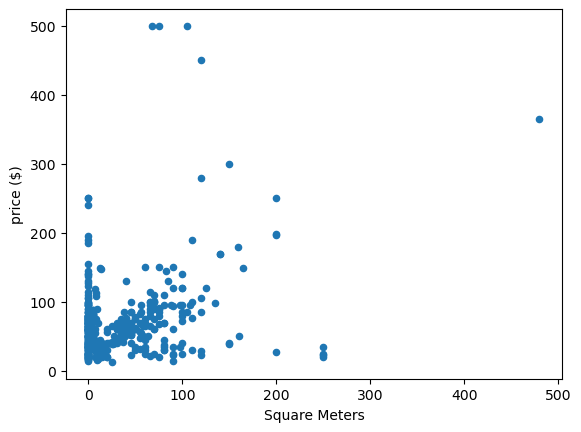

In [441]:
#Visualizo si hay relaciones entre variables
#df_madrid_cleaned['Neighbourhood Group Cleansed Encoded'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.yscale("linear")
#plt.xlabel('Neighbourhood Group Cleansed Encoded')


df_madrid_cleaned.plot(kind = 'scatter',x='Neighbourhood Group Cleansed Encoded',y = 'Price')
plt.xlabel('Neighbourhood Group Cleansed Encoded')
plt.ylabel('price ($)')
plt.show()

df_madrid_cleaned.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.xlabel('Cleaning Fee')
plt.ylabel('price ($)')
plt.show()

df_madrid_cleaned.plot(kind = 'scatter',x='Price',y = 'Accommodates')
plt.xlabel('price ($)')
plt.ylabel('Accommodates')
plt.show()

df_madrid_cleaned.plot(kind = 'scatter',x='Neighbourhood Group Cleansed Encoded',y = 'Cleaning Fee')
plt.xlabel('Neighbourhood Group Cleansed Encoded')
plt.ylabel('Cleaning Fee')
plt.show()

df_madrid_cleaned.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('#Bedrooms')
plt.ylabel('price ($)')
plt.show()

df_madrid_cleaned.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('#Beds')
plt.ylabel('price ($)')
plt.show()

df_madrid_cleaned.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('#Bathrooms')
plt.ylabel('price ($)')
plt.show()

df_madrid_cleaned.plot(kind = 'scatter',x='Square Meters',y = 'Price')
plt.xlabel('Square Meters')
plt.ylabel('price ($)')
plt.show()



Al observar estas gráficas se pueden interpretar outliers como los puntos más alejados, pero realmente no hay puntos que pueda afirmar como outliers, asi que decido no sacar ningún punto, al menos de las variables analizadas.

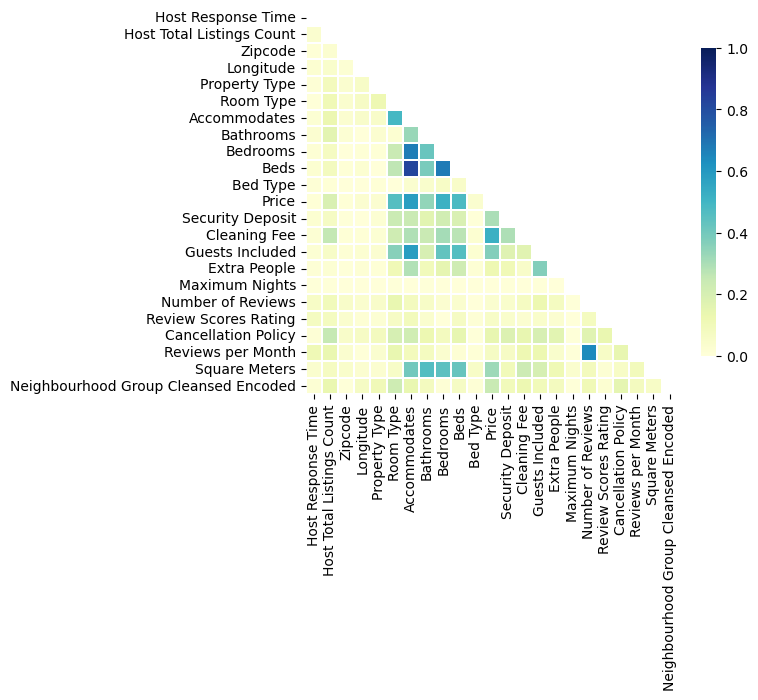

In [442]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_madrid_cleaned.corr(numeric_only=True))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

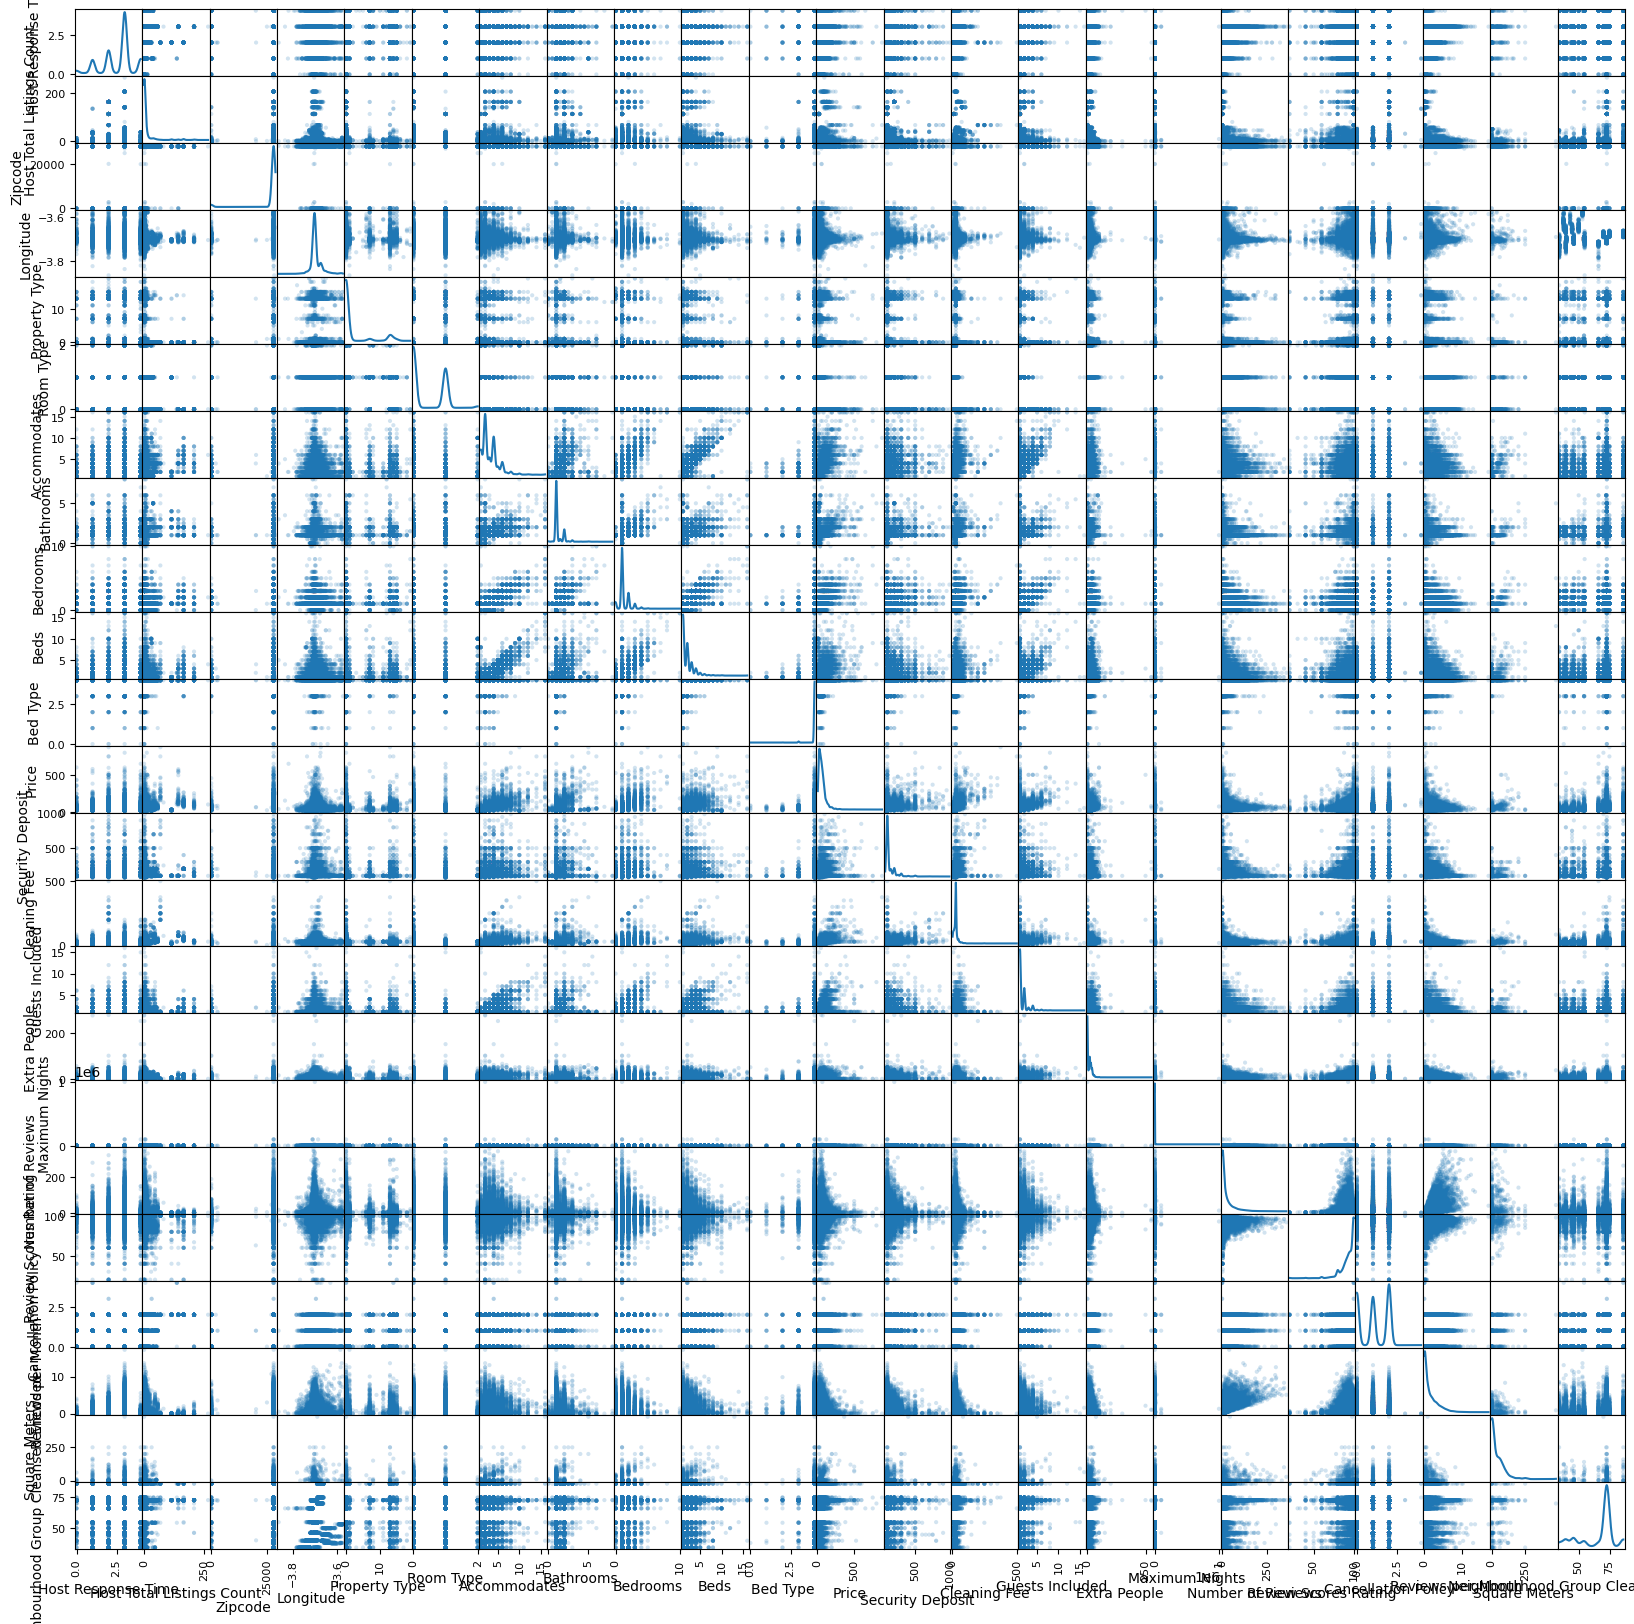

In [443]:
pd.plotting.scatter_matrix(df_madrid_cleaned, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [445]:
#A pesar de la gran correlación que se puede apreciar entre 'Price' y 'Square Meters' voy a optar
#por no tener en cuenta los metros cuadrados ya que hay más de un 96% de valores nulos, con lo cual quedaria 
#reducido a un dataset muy pequeño y perderia, quizás, la representatividad.
#de todas formas me queda pebndiente realizarlo para ver cómo daría el modelo

df_madrid_cleaned = df_madrid_cleaned.drop(['Square Meters'], axis=1)


In [446]:
df_madrid_cleaned.dtypes

Host Response Time                        int64
Host Total Listings Count               float64
Zipcode                                 float64
Longitude                               float64
Property Type                             int64
Room Type                                 int64
Accommodates                              int64
Bathrooms                               float64
Bedrooms                                float64
Beds                                    float64
Bed Type                                  int64
Price                                   float64
Security Deposit                        float64
Cleaning Fee                            float64
Guests Included                           int64
Extra People                              int64
Maximum Nights                            int64
Number of Reviews                         int64
Review Scores Rating                    float64
Cancellation Policy                       int64
Reviews per Month                       

In [447]:
print(df_madrid_cleaned.shape)
df_madrid_cleaned.isnull().sum()

(10586, 22)


Host Response Time                      0
Host Total Listings Count               0
Zipcode                                 0
Longitude                               0
Property Type                           0
Room Type                               0
Accommodates                            0
Bathrooms                               0
Bedrooms                                0
Beds                                    0
Bed Type                                0
Price                                   0
Security Deposit                        0
Cleaning Fee                            0
Guests Included                         0
Extra People                            0
Maximum Nights                          0
Number of Reviews                       0
Review Scores Rating                    0
Cancellation Policy                     0
Reviews per Month                       0
Neighbourhood Group Cleansed Encoded    0
dtype: int64

Modelado (Cross-validation y resultados train y test)

In [486]:
# Carga de datos
df_airbnb_train = pd.read_csv('airbnb-listings-extract_train.csv', sep=";", decimal='.')

#----------------
#Eliminación de columnas que son url, strings no convertibles a categóricas o que no tienen importancia para el modelo

columns_no_imp = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Verifications', 'Street','Neighbourhood', 'Neighbourhood Cleansed',
       'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'First Review', 'Last Review',
       'Review Scores Value', 'Calculated host listings count',
       'Geolocation', 'Features','Amenities','State','Market','Smart Location',
       'Country Code','Country' ]

df_airbnb_cleaned_train = df_airbnb_train.copy()

df_airbnb_cleaned_train.drop(columns=[col for col in columns_no_imp if col in df_airbnb_cleaned_train.columns], inplace=True)

#-------------------
# Imputación

# Para el caso de la variable 'Price' , elimino los valores nulos ya que son pocos (15 en total), y no se pueden usar para entrenar el modelo.
df_airbnb_cleaned_train = df_airbnb_cleaned_train.dropna(subset=['Price'])
#Para  el resto de las variables de Bathroom, Bedrooms y Beds, completo los null (son relativamente podcos valores) con la moda o cero según el caso:

columns_to_impute = ['Bathrooms', 'Bedrooms', 'Beds']

# Imputar valores nulos con la moda de cada columna
for col in columns_to_impute:
    df_airbnb_cleaned_train[col] = df_airbnb_cleaned_train[col].fillna(df_airbnb_cleaned_train[col].mode()[0])

#-------------------

# La idea es predecir el precio de los airbnb en la ciudad de Madrid
# Filtro todas las filas donde 'City' contenga la palabra "Madrid" (ignorando mayúsculas/minúsculas y na)
df_madrid_cleaned_train = df_airbnb_cleaned_train[df_airbnb_cleaned_train['City'].str.contains('madrid', case=False, na=False)]


# Eliminamos la columna City
df_madrid_cleaned_train = df_madrid_cleaned_train.drop(['City'], axis=1)


#-------------------

# Como me interesa los barrios: aplico un Target encoder a la variable 'Neighbourhood Group Cleansed' 
# Calculo la media del precio 
target_mean = df_madrid_cleaned_train.groupby('Neighbourhood Group Cleansed')['Price'].mean()

# Mapeo las medias a
df_madrid_cleaned_train['Neighbourhood Group Cleansed Encoded'] = df_madrid_cleaned_train['Neighbourhood Group Cleansed'].map(target_mean)

# Mapeo las medias al conjunto de prueba y cambio los nulls por la media 
global_mean =df_madrid_cleaned_train ['Price'].mean()
df_madrid_cleaned_train['Neighbourhood Group Cleansed Encoded'] = df_madrid_cleaned_train['Neighbourhood Group Cleansed'].map(target_mean).fillna(global_mean)


#-------------------


# Veo que las varibles 'License' y 'Jurisdiction Name' tiene muchos na, las quito:
# Eliminar columnas del DataFrame original
df_madrid_cleaned_train.drop(['License', 'Jurisdiction Names'], axis=1, inplace=True)

# Nota: Square Feet sería una variable de interés, pero tiene un 96% de valores nulos, sin embargo no la descarto
#y decido pasar a Square Meters
df_madrid_cleaned_train['Square Meters'] = df_madrid_cleaned_train['Square Feet'] * 0.092903


#-------------------

#Variables categóricas e imputaciones de las columnas restantes
#Zipcode:lo convierto en int
from sklearn.calibration import LabelEncoder

df_madrid_cleaned_train['Zipcode'] = pd.to_numeric(df_madrid_cleaned_train['Zipcode'], errors='coerce')  # Convierte y pone NaN en caso de error
df_madrid_cleaned_train['Zipcode'].fillna(0, inplace=True)

#Host Response Time 
le = LabelEncoder()
df_madrid_cleaned_train['Host Response Time'] = le.fit_transform(df_madrid_cleaned_train['Host Response Time'])

#Bed Type
df_madrid_cleaned_train['Bed Type'] = le.fit_transform(df_madrid_cleaned_train['Bed Type'])

#Cancellation Policy
df_madrid_cleaned_train['Cancellation Policy'] = le.fit_transform(df_madrid_cleaned_train['Cancellation Policy'])

#Property Type                            
df_madrid_cleaned_train['Property Type'] = le.fit_transform(df_madrid_cleaned_train['Property Type'])

#Room Type 
df_madrid_cleaned_train['Room Type'] = le.fit_transform(df_madrid_cleaned_train['Room Type'])

#Host Total Listings Count
df_madrid_cleaned_train['Host Total Listings Count'].fillna(0, inplace=True)

#Security Deposit 
df_madrid_cleaned_train['Security Deposit'].fillna(df_madrid_cleaned_train['Security Deposit'].mode()[0], inplace=True)

#Cleaning Fee
df_madrid_cleaned_train['Cleaning Fee'].fillna(df_madrid_cleaned_train['Cleaning Fee'].mode()[0], inplace=True)

#Review Scores Rating
df_madrid_cleaned_train['Review Scores Rating'].fillna(df_madrid_cleaned_train['Review Scores Rating'].mode()[0], inplace=True)

#Reviews per Month 
df_madrid_cleaned_train['Reviews per Month'].fillna(0, inplace=True)

columns_to_enc =['Neighbourhood Group Cleansed']

df_madrid_cleaned_train.drop(columns=[col for col in columns_to_enc if col in df_madrid_cleaned_train.columns], inplace=True)

#-------------------


#Luego de analizar correlaciones, decido sacar también las columnas con muy alta correlación o muy baja: 
columns_to_drop_corr =['Weekly Price', 'Monthly Price', 'Review Scores Location','Review Scores Cleanliness',
                       'Review Scores Accuracy','Minimum Nights','Host Response Rate',
                       'Review Scores Communication', 'Review Scores Checkin',
                       'Latitude', 'ID', 'Host ID','Maximum Nights'
                       'Number of Reviews', 'Square Feet','Host Listings Count'] 


df_madrid_cleaned_train.drop(columns=[col for col in columns_to_drop_corr if col in df_madrid_cleaned_train.columns], inplace=True)

#-------------------

#A pesar de la gran correlación que se puede apreciar entre 'Price' y 'Square Meters' voy a optar
#por no tener en cuenta los metros cuadrados ya que hay más de un 96% de valores nulos, con lo cual quedaria 
#reducido a un dataset muy pequeño y perderia, quizás, la representatividad.
#de todas formas me queda pebndiente realizarlo para ver cómo daría el modelo

df_madrid_cleaned_train = df_madrid_cleaned_train.drop(['Square Meters'], axis=1)


# Mover Price al inicio
columna_a_mover = 'Price'
columnas = [columna_a_mover] + [col for col in df_madrid_cleaned_train.columns if col != columna_a_mover]
df_madrid_cleaned_train = df_madrid_cleaned_train[columnas]




In [465]:
df_airbnb_cleaned_train.shape

(11809, 39)

Aplico al test

In [487]:
# Carga de datos test
df_airbnb_test = pd.read_csv('airbnb-listings-extract_test.csv', sep=";", decimal='.')

#----------------
#Eliminación de columnas que son url, strings no convertibles a categóricas o que no tienen importancia para el modelo

columns_no_imp = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Verifications', 'Street','Neighbourhood', 'Neighbourhood Cleansed',
       'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'First Review', 'Last Review',
       'Review Scores Value', 'Calculated host listings count',
       'Geolocation', 'Features','Amenities','State','Market','Smart Location',
       'Country Code','Country' ]

df_airbnb_cleaned_test = df_airbnb_test.copy()

df_airbnb_cleaned_test.drop(columns=[col for col in columns_no_imp if col in df_airbnb_cleaned_test.columns], inplace=True)

#-------------------
# Imputación

# Para el caso de la variable 'Price' , elimino los valores nulos ya que son pocos (15 en total), y no se pueden usar para entrenar el modelo.
df_airbnb_cleaned_test = df_airbnb_cleaned_test.dropna(subset=['Price'])
#Para  el resto de las variables de Bathroom, Bedrooms y Beds, completo los null (son relativamente podcos valores) con la moda o cero según el caso:

columns_to_impute = ['Bathrooms', 'Bedrooms', 'Beds']

# Imputar valores nulos con la moda de cada columna
for col in columns_to_impute:
    df_airbnb_cleaned_test[col] = df_airbnb_cleaned_test[col].fillna(df_airbnb_cleaned_train[col].mode()[0])

#-------------------

# La idea es predecir el precio de los airbnb en la ciudad de Madrid
# Filtro todas las filas donde 'City' contenga la palabra "Madrid" (ignorando mayúsculas/minúsculas y na)
df_madrid_cleaned_test = df_airbnb_cleaned_test[df_airbnb_cleaned_test['City'].str.contains('madrid', case=False, na=False)]


# Eliminamos la columna City
df_madrid_cleaned_test = df_madrid_cleaned_test.drop(['City'], axis=1)


#-------------------

# Como me interesa los barrios: aplico un Target encoder a la variable 'Neighbourhood Group Cleansed' 
# Calculo la media del precio 
target_mean = df_madrid_cleaned_test.groupby('Neighbourhood Group Cleansed')['Price'].mean()

# Mapeo las medias a
df_madrid_cleaned_test['Neighbourhood Group Cleansed Encoded'] = df_madrid_cleaned_test['Neighbourhood Group Cleansed'].map(target_mean)

# Mapeo las medias al conjunto de prueba y cambio los nulls por la media 
global_mean =df_madrid_cleaned_test ['Price'].mean()
df_madrid_cleaned_test['Neighbourhood Group Cleansed Encoded'] = df_madrid_cleaned_test['Neighbourhood Group Cleansed'].map(target_mean).fillna(global_mean)


#-------------------


# Veo que las varibles 'License' y 'Jurisdiction Name' tiene muchos na, las quito:
# Eliminar columnas del DataFrame original
df_madrid_cleaned_test.drop(['License', 'Jurisdiction Names'], axis=1, inplace=True)

# Nota: Square Feet sería una variable de interés, pero tiene un 96% de valores nulos, sin embargo no la descarto
#y decido pasar a Square Meters
df_madrid_cleaned_test['Square Meters'] = df_madrid_cleaned_test['Square Feet'] * 0.092903


#-------------------

#Variables categóricas e imputaciones de las columnas restantes
#Zipcode:lo convierto en int
from sklearn.calibration import LabelEncoder

df_madrid_cleaned_test['Zipcode'] = pd.to_numeric(df_madrid_cleaned_test['Zipcode'], errors='coerce')  # Convierte y pone NaN en caso de error
df_madrid_cleaned_test['Zipcode'].fillna(0, inplace=True)

#Host Response Time 
le = LabelEncoder()
df_madrid_cleaned_test['Host Response Time'] = le.fit_transform(df_madrid_cleaned_test['Host Response Time'])

#Bed Type
df_madrid_cleaned_test['Bed Type'] = le.fit_transform(df_madrid_cleaned_test['Bed Type'])

#Cancellation Policy
df_madrid_cleaned_test['Cancellation Policy'] = le.fit_transform(df_madrid_cleaned_test['Cancellation Policy'])

#Property Type                            
df_madrid_cleaned_test['Property Type'] = le.fit_transform(df_madrid_cleaned_test['Property Type'])

#Room Type 
df_madrid_cleaned_test['Room Type'] = le.fit_transform(df_madrid_cleaned_test['Room Type'])

#Host Total Listings Count
df_madrid_cleaned_test['Host Total Listings Count'].fillna(0, inplace=True)

#Security Deposit 
df_madrid_cleaned_test['Security Deposit'].fillna(df_madrid_cleaned_train['Security Deposit'].mode()[0], inplace=True)

#Cleaning Fee
df_madrid_cleaned_test['Cleaning Fee'].fillna(df_madrid_cleaned_train['Cleaning Fee'].mode()[0], inplace=True)

#Review Scores Rating
df_madrid_cleaned_test['Review Scores Rating'].fillna(df_madrid_cleaned_train['Review Scores Rating'].mode()[0], inplace=True)

#Reviews per Month 
df_madrid_cleaned_test['Reviews per Month'].fillna(0, inplace=True)

columns_to_enc =['Neighbourhood Group Cleansed']

df_madrid_cleaned_test.drop(columns=[col for col in columns_to_enc if col in df_madrid_cleaned_test.columns], inplace=True)

#-------------------


#Luego de analizar correlaciones, decido sacar también las columnas con muy alta correlación o muy baja: 
columns_to_drop_corr =['Weekly Price', 'Monthly Price', 'Review Scores Location','Review Scores Cleanliness',
                       'Review Scores Accuracy','Minimum Nights','Host Response Rate',
                       'Review Scores Communication', 'Review Scores Checkin',
                       'Latitude', 'ID', 'Host ID','Maximum Nights'
                       'Number of Reviews', 'Square Feet','Host Listings Count'] 


df_madrid_cleaned_test.drop(columns=[col for col in columns_to_drop_corr if col in df_madrid_cleaned_test.columns], inplace=True)

#-------------------

#A pesar de la gran correlación que se puede apreciar entre 'Price' y 'Square Meters' voy a optar
#por no tener en cuenta los metros cuadrados ya que hay más de un 96% de valores nulos, con lo cual quedaria 
#reducido a un dataset muy pequeño y perderia, quizás, la representatividad.
#de todas formas me queda pebndiente realizarlo para ver cómo daría el modelo

df_madrid_cleaned_test = df_madrid_cleaned_test.drop(['Square Meters'], axis=1)


# Mover Price al inicio
columna_a_mover = 'Price'
columnas = [columna_a_mover] + [col for col in df_madrid_cleaned_test.columns if col != columna_a_mover]
df_madrid_cleaned_test = df_madrid_cleaned_test[columnas]

Preparación de datos para sklearn

In [488]:
from sklearn import preprocessing

# Dataset de train
data_train = df_madrid_cleaned_train.values
y_train = data_train[:,0:1]     #  1ª columna, price
X_train = data_train[:,1:]      #  resto

# Dataset de test
data_test = df_madrid_cleaned_test.values
y_test = data_test[:,0:1]     # 1ª columna, price
X_test = data_test[:,1:]      # resto





In [489]:
# Escalamos (con train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

XtestScaled = scaler.transform(X_test) 

In [490]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (10586, 21)
Datos test:  (2650, 21)


best mean cross-validation score: -1398.631
best parameters: {'alpha': 0.37926901907322497}


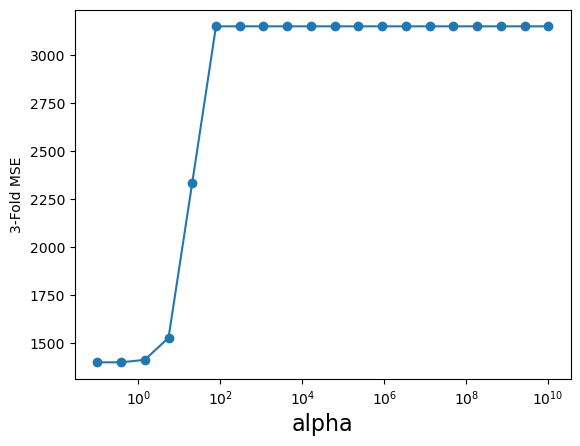

In [491]:
#CV y busqueda de parámetros óptimos

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [492]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = df_airbnb_cleaned_train.columns[1:] 

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.39e+03
MSE Modelo Lasso (test) : 1.42e+03
RMSE Modelo Lasso (train): 37.2
RMSE Modelo Lasso (test) : 37.7
Host ID 0.0
Host Response Time 0.7704197218287164
Host Response Rate -0.0
Host Listings Count -0.0
Host Total Listings Count 0.6559758684835982
Neighbourhood Group Cleansed -12.146447597439002
City 12.954894750797447
Zipcode 6.013572389451293
Latitude 8.554428874555558
Longitude -0.0
Property Type 0.0
Room Type 1.990812962546985
Accommodates 16.19834097256038
Bathrooms 1.1291950649419786
Bedrooms -1.4330798860792524
Beds 0.0
Bed Type -0.3991719452577177
Square Feet 3.915936638276432
Price -1.1507320244236396
Weekly Price -3.3189302239490543
Monthly Price 6.555145468164126


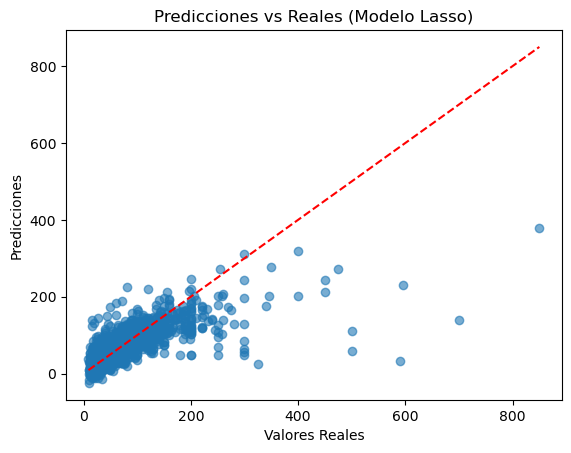

In [484]:
# Comparo predicciones vs valores reales con gráficos
plt.scatter(y_test, ytestLasso, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Reales (Modelo Lasso)")
plt.show()


Mirando un poco los valores de MSE y RMSE puedo interpretar que el modelo está generalizando bien porque el RMSE de entrenamiento y prueba son similares. También se puede ver  en la tendencia lineal entre las variables en el gráfico.
Pero el valor obtenido de 37.7 indica que el modelo tiene un margen de error significativo en las predicciones. Esto podría mejorarse al quitar las variables que se identificaron por el método Lasso como "poco útiles" (se identifican porque el coeficiente es cero), las mismas son:
Host ID 0.0
Host Response Rate -0.0
Host Listings Count -0.0
Longitude -0.0
Property Type 0.0
Beds 0.0
Hay otras variables que son cercanos a cero, habría que ver que dan en una iteración del modelo.

Próximo paso: Eliminar las columnas irrelevantes según Lasso

In [497]:
columns_unuseful_lasso =['Host Total Listings Count', 'Longitude', 'Property Type', 'Beds']

df_madrid_cleaned_test.drop(columns=[col for col in columns_unuseful_lasso if col in df_madrid_cleaned_test.columns], inplace=True)

df_madrid_cleaned_train.drop(columns=[col for col in columns_unuseful_lasso if col in df_madrid_cleaned_train.columns], inplace=True)


In [498]:
# Dataset de train
data_train = df_madrid_cleaned_train.values
y_train = data_train[:,0:1]     #  1ª columna, price
X_train = data_train[:,1:]      #  resto

# Dataset de test
data_test = df_madrid_cleaned_test.values
y_test = data_test[:,0:1]     # 1ª columna, price
X_test = data_test[:,1:]      # resto

# Escalamos (con train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

XtestScaled = scaler.transform(X_test) 

best mean cross-validation score: -1398.717
best parameters: {'alpha': 0.1}


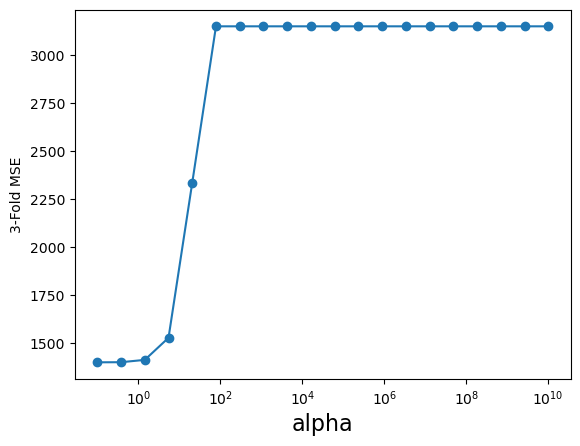

In [499]:
#CV y busqueda de parámetros óptimos

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [500]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = df_airbnb_cleaned_train.columns[1:] 

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.39e+03
MSE Modelo Lasso (test) : 1.42e+03
RMSE Modelo Lasso (train): 37.2
RMSE Modelo Lasso (test) : 37.6
Host ID 0.16119556108212146
Host Response Time -0.23579921661821446
Host Response Rate -12.29804118630724
Host Listings Count 13.101656290556972
Host Total Listings Count 6.298036436746438
Neighbourhood Group Cleansed 8.470528412814524
City 0.01799919461518363
Zipcode 2.118335857759633
Latitude 16.424260449394673
Longitude 1.4560900801996703
Property Type -1.8767049544337484
Room Type 0.0
Accommodates -0.587606666878027
Bathrooms 4.0730287501936155
Bedrooms -1.3671346866573013
Beds -3.59747915414324
Bed Type 6.836844505582846


La eliminación de las columnas no mejoró al modelo significativamente, ya que los valores de RMSE y MSE dieron similares, quedaría probar con otro modelo como Random Forest, que no llegué a probar pero me queda como tarea!